# Customer Segmentation using kMeans Clustering

### Importing Required Libraries

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data from CSV File

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\Data Science\Cust_Segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Data Preprocessing

In [3]:
df = df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


### Normalization

In [4]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
X_n = StandardScaler().fit_transform(X)

### kMeans Clustering

In [5]:
from sklearn.cluster import KMeans 
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Assigning Labels to Data Points

In [6]:
df['Labels'] = k_means.labels_
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Labels
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,3
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


### Visualizing Clusters

<IPython.core.display.Javascript object>


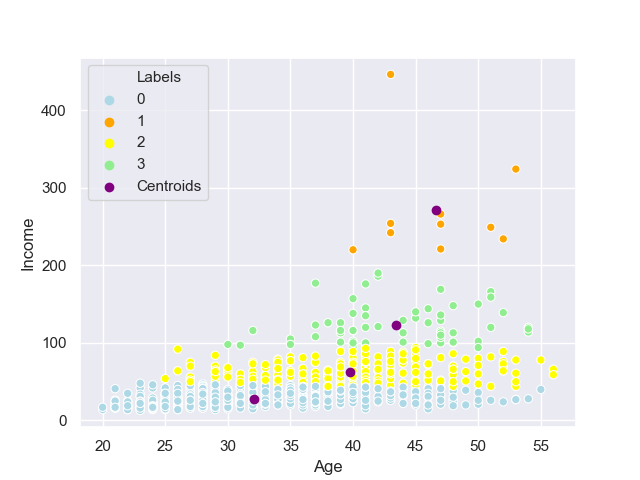

In [7]:
from matplotlib.colors import ListedColormap
import seaborn as sns
colors = ['LightBlue', 'Orange', 'Yellow', 'LightGreen']
cmap = ListedColormap(colors)
sns.set()
plt.figure()
sns.scatterplot(x = df.Age, y = df.Income, hue = df.Labels, palette = cmap)
centers = k_means.cluster_centers_
plt.scatter(centers[:,0], centers[:,3], label = 'Centroids', color = 'Purple')
plt.legend()

<IPython.core.display.Javascript object>


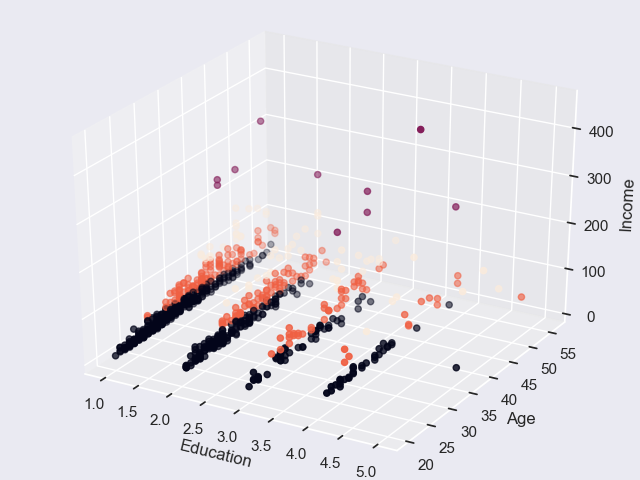

In [8]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
plt.clf()
ax = Axes3D(fig)
plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
ax.scatter(df.Edu, df.Age, df.Income, c= df.Labels.astype(np.float))

### Conclusions from the Model

In [9]:
cdf = df[['Age', 'Income', 'DebtIncomeRatio', 'Other Debt', 'Labels']]
cdf = cdf.groupby(['Labels'])
cdf['Labels'].count()

Labels
0    559
1     10
2    221
3     60
Name: Labels, dtype: int64

In [10]:
cdf.mean()

,Age,Income,DebtIncomeRatio,Other Debt
Labels,,,,
0,32.050089,28.048301,10.122898,1.896669
1,46.600000,270.900000,8.210000,13.375200
2,39.764706,62.814480,10.691855,4.445878
3,43.416667,123.400000,9.036667,7.340467
